In [1]:
import pandas as pd
import numpy as np
import math
import cv2
from matplotlib import pyplot as plt

In [2]:
def label_analysis(path = './data/ntu_final_2018/train.csv'):
    train_df = pd.read_csv(path, dtype="str")[0:10002]
    labels = []
    for label in train_df['Labels']:
        labels += [[int(x) for x in label.split(" ")]]
    labels = pd.DataFrame(labels, dtype="int64")
    print("Each illness:")
    print(labels.sum())
    print("How many:")
    print(labels.sum(axis=1).value_counts())

In [3]:
label_analysis()

Each illness:
0     1003
1      254
2     1088
3     1666
4      476
5      545
6      117
7      385
8      403
9      226
10     220
11     162
12     250
13      22
dtype: int64
How many:
0    5592
1    2682
2    1219
3     380
4      98
5      23
6       6
7       2
dtype: int64


In [4]:
def load_labeled_data(train_img_folder = './data/data/images/', path = './data/ntu_final_2018/train.csv',
    reshaped_size = (150,150), max_image_cnt = 10002):
    
    # loading the dataset
    train_df = pd.read_csv(path, dtype="str")

    idx, labels = train_df['Image Index'], train_df['Labels']

    label_img, labels_res = [], []

    print("Loading Training Images and Labels")
    one_peercent_len = max_image_cnt // 100
    for img_id, label in zip(idx, labels):
        cnt = len(label_img)
        if  cnt % one_peercent_len == 0:
            print (cnt / one_peercent_len, "% done")
        if  cnt >= max_image_cnt:
            break
        
        img = cv2.imread(train_img_folder + img_id, cv2.IMREAD_GRAYSCALE)
        res = cv2.resize(img, dsize = reshaped_size) / 255.0
        res = res.reshape((reshaped_size[0], reshaped_size[1], 1))

        label_img.append(res)
        label = [int(x) for x in label.split(" ")]
        labels_res.append(label)
    
    print("Done Training Images and Labels")
    label_img, labels_res = np.array(label_img), np.array(labels_res)

    print(label_img.shape, labels_res.shape)
    return label_img, labels_res

In [5]:
img, res = load_labeled_data(max_image_cnt=100)

Loading Training Images and Labels
0.0 % done
1.0 % done
2.0 % done
3.0 % done
4.0 % done
5.0 % done
6.0 % done
7.0 % done
8.0 % done
9.0 % done
10.0 % done
11.0 % done
12.0 % done
13.0 % done
14.0 % done
15.0 % done
16.0 % done
17.0 % done
18.0 % done
19.0 % done
20.0 % done
21.0 % done
22.0 % done
23.0 % done
24.0 % done
25.0 % done
26.0 % done
27.0 % done
28.0 % done
29.0 % done
30.0 % done
31.0 % done
32.0 % done
33.0 % done
34.0 % done
35.0 % done
36.0 % done
37.0 % done
38.0 % done
39.0 % done
40.0 % done
41.0 % done
42.0 % done
43.0 % done
44.0 % done
45.0 % done
46.0 % done
47.0 % done
48.0 % done
49.0 % done
50.0 % done
51.0 % done
52.0 % done
53.0 % done
54.0 % done
55.0 % done
56.0 % done
57.0 % done
58.0 % done
59.0 % done
60.0 % done
61.0 % done
62.0 % done
63.0 % done
64.0 % done
65.0 % done
66.0 % done
67.0 % done
68.0 % done
69.0 % done
70.0 % done
71.0 % done
72.0 % done
73.0 % done
74.0 % done
75.0 % done
76.0 % done
77.0 % done
78.0 % done
79.0 % done
80.0 % done
81.

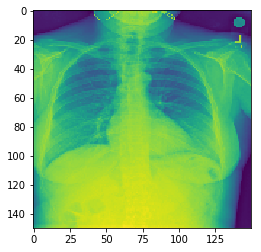

In [6]:
plt.imshow(img[0].reshape(150,150))

In [7]:
from keras.preprocessing.image import ImageDataGenerator
core_idg = ImageDataGenerator(samplewise_center=True, 
                              samplewise_std_normalization=True, 
                              horizontal_flip = True, 
                              vertical_flip = False, 
                              height_shift_range= 0.05, 
                              width_shift_range=0.1, 
                              rotation_range=20, 
                              shear_range = 0.1,
                              fill_mode = 'nearest',
                              zoom_range=[0.95,1.25])

Using TensorFlow backend.


In [8]:
img = core_idg.standardize(img)
core_idg.fit(img)

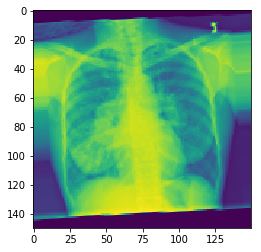

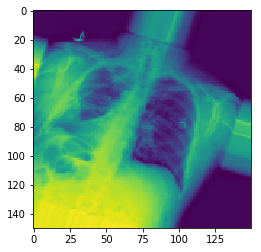

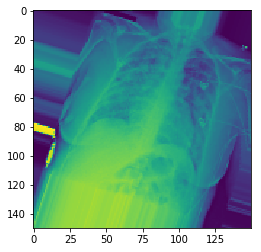

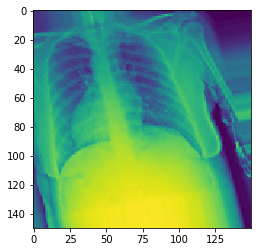

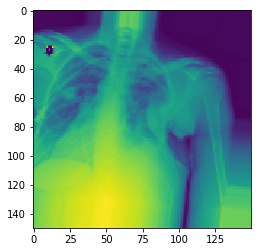

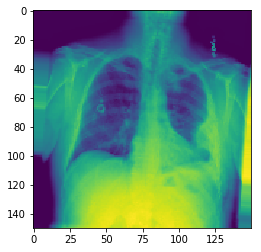

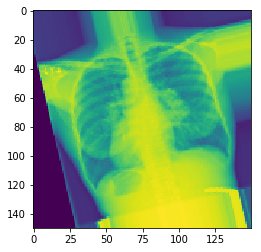

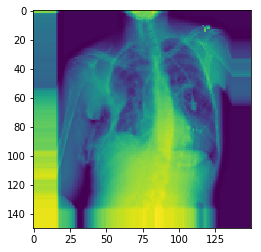

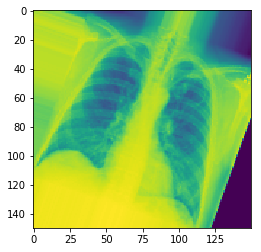

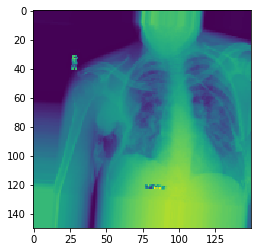

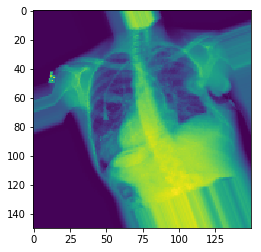

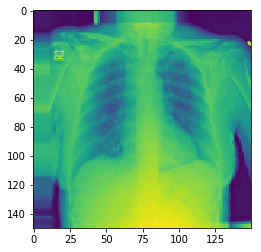

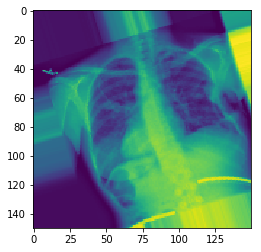

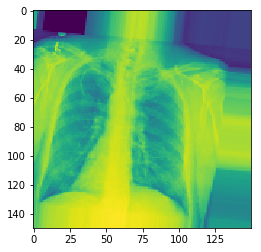

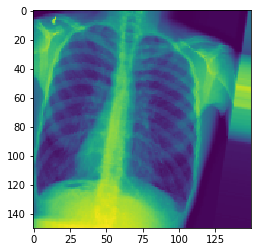

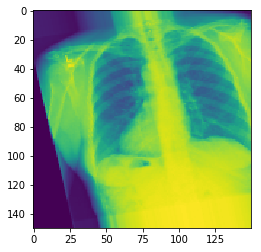

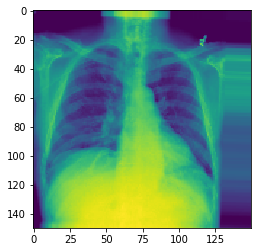

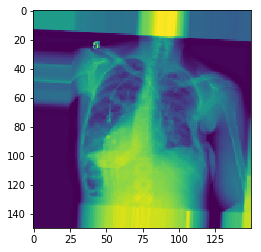

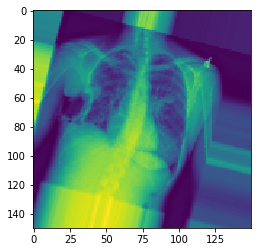

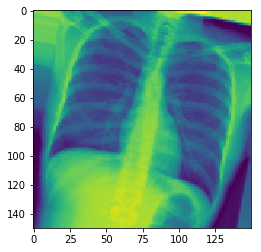

In [9]:
cnt = 0
argu = []
for i in core_idg.flow(img, batch_size=1):
    if cnt>=20: break
    argu += [np.array(i).reshape(150,150)]
    cnt += 1
for i in argu:
    plt.imshow(i)
    plt.show()